# **EFFICIENTNET-B0 FOR X-RAY IMAGES**

In [ ]:
from google.colab import drive #mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/full #unzipping dataset

Streaming output truncated to the last 5000 lines.
  inflating: full/train/normal/Normal-10010.png  
  inflating: __MACOSX/full/train/normal/._Normal-10010.png  
  inflating: full/train/normal/Normal-2408.png  
  inflating: __MACOSX/full/train/normal/._Normal-2408.png  
  inflating: full/train/normal/Normal-716.png  
  inflating: __MACOSX/full/train/normal/._Normal-716.png  
  inflating: full/train/normal/Normal-7564.png  
  inflating: __MACOSX/full/train/normal/._Normal-7564.png  
  inflating: full/train/normal/Normal-10004.png  
  inflating: __MACOSX/full/train/normal/._Normal-10004.png  
  inflating: full/train/normal/Normal-1883.png  
  inflating: __MACOSX/full/train/normal/._Normal-1883.png  
  inflating: full/train/normal/Normal-9575.png  
  inflating: __MACOSX/full/train/normal/._Normal-9575.png  
  inflating: full/train/normal/Normal-1897.png  
  inflating: __MACOSX/full/train/normal/._Normal-1897.png  
  inflating: full/train/normal/Normal-4737.png  
  inflating: __MACOSX/full

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
#defining efficientnet-b0 model (with imagenet weights)
model = EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
#importing required libraries
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [ ]:
#defining model architecture
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid")(x)

In [ ]:
model_final = tf.keras.Model( model.input, predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#compiling model
model_final.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:357: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
images=[]
labels=[]

In [ ]:
import cv2
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
a="/content/full/train/covid/" #path for covid positive training images

In [ ]:
#preparing data for training
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA) #resizing

    except:
        break
        print("b")

    images.append(resized)
    labels.append("1") #1 for covid pos
    
for item in os.listdir("/content/full/train/normal"): #path for covid neg train images
    img = cv2.imread("/content/full/train/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break

    images.append(res)
    labels.append("0") #0 for covid neg
    

In [ ]:
images=np.asarray(images) 

In [ ]:
labels=np.asarray(labels)

In [ ]:
trainy=labels.astype("uint8")

In [ ]:
#creating dataframe of images and their corresponding labels to shuffle the train data
df = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df) #shuffling df

In [ ]:
trainx=np.asarray(trainx) #converting back to array

In [ ]:
trainx.shape

(3000,)

In [ ]:
trainx[0].shape

(224, 224, 3)

In [ ]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i]
    traindata.append(trx)

In [ ]:
traindata=np.asarray(traindata)

In [ ]:
trainy=np.asarray(trainy)

In [ ]:
trainy=trainy.astype("uint8")

In [ ]:
#training the model
eff_hist=model_final.fit(traindata, trainy, epochs=40, validation_split=0.1)  

Epoch 1/40
85/85 [==============================] - 206s 2s/step - loss: 0.4939 - acc: 0.8693 - val_loss: 0.1504 - val_acc: 0.9467
Epoch 2/40
85/85 [==============================] - 198s 2s/step - loss: 0.1258 - acc: 0.9485 - val_loss: 0.0976 - val_acc: 0.9567
Epoch 3/40
85/85 [==============================] - 195s 2s/step - loss: 0.0963 - acc: 0.9667 - val_loss: 0.0902 - val_acc: 0.9600
Epoch 4/40
85/85 [==============================] - 195s 2s/step - loss: 0.0848 - acc: 0.9700 - val_loss: 0.0816 - val_acc: 0.9767
Epoch 5/40
85/85 [==============================] - 196s 2s/step - loss: 0.0549 - acc: 0.9785 - val_loss: 0.0691 - val_acc: 0.9633
Epoch 6/40
85/85 [==============================] - 196s 2s/step - loss: 0.0406 - acc: 0.9837 - val_loss: 0.0661 - val_acc: 0.9767
Epoch 7/40
85/85 [==============================] - 194s 2s/step - loss: 0.0423 - acc: 0.9856 - val_loss: 0.0562 - val_acc: 0.9733
Epoch 8/40
85/85 [==============================] - 196s 2s/step - loss: 0.0388 - a

In [ ]:
#now repeating the same steps as above for preparing the test data..

In [ ]:
a="/content/full/test/covid/"  #path for covid pos test images

In [ ]:
images=[]
labels=[]

In [ ]:
#preparing test set
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA) #resizing
        #print("t")
    except:
        break
        print("b")
 
    images.append(resized)
    labels.append("1")
    
for item in os.listdir("/content/full/test/normal"): #path for covid neg test images
    img = cv2.imread("/content/full/test/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0")

In [ ]:
images=np.asarray(images)

In [ ]:
images.shape

(1000, 224, 224, 3)

In [ ]:
labels=np.asarray(labels)

In [ ]:
labels.shape

(1000,)

In [ ]:
testy=labels.astype("uint8")

In [ ]:
#creating dataframe of test images and their corresponding labels to shuffle the test set
dframe = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
from sklearn.utils import shuffle #shuffling the df
dframe = shuffle(dframe)

In [ ]:
testx=dframe["Image"]

In [ ]:
testy=dframe["Label"]

In [ ]:
testx=np.asarray(testx)

In [ ]:
testdata=[]
for i in range(len(testx)):
  tsx=testx[i]
  testdata.append(tsx)

In [ ]:
testdata=np.asarray(testdata) #converting back to array

In [ ]:
testy=np.asarray(testy)

In [ ]:
testy=testy.astype("uint8")

In [ ]:
#evaluating the model
score = model_final.evaluate(testdata, testy, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.19601623713970184
Test accuracy: 0.9670000076293945


In [ ]:
#generating predictions
predictions = model_final.predict(testdata)


In [ ]:
preds=[]
for i in range(len(predictions)):
  if(predictions[i]>=0.5):
    preds.append(int("1"))
  else:
    preds.append(int("0"))

In [ ]:
preds=np.array(preds)

In [ ]:
ctr=0 #counting misclassifications
for i in range(len(preds)):
  if(preds[i]!=testy[i]):
    ctr=ctr+1
print(ctr)

33


In [ ]:
#performance metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
precision = precision_score(testy, preds) #precision

In [ ]:
print(precision)

0.9533980582524272


In [ ]:
matrix = confusion_matrix(testy, preds) #confusion matrix

In [ ]:
print(matrix)

[[476  24]
 [  9 491]]


In [ ]:
recall = recall_score(testy, preds) #recall

In [ ]:
print(recall)

0.982


In [ ]:
f1=f1_score(testy, preds) #f1-score

In [ ]:
print(f1)

0.9674876847290641


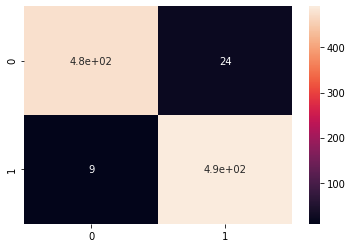

In [ ]:
import seaborn as sns #plotting confusion matrix
sns.heatmap(matrix, annot=True)

In [ ]:
kappa = cohen_kappa_score(testy, preds) #cohen kappa score
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.934000
